<a href="https://colab.research.google.com/github/mohityadav11a/asteroid_spectra/blob/main/data_enrichment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Data Enrichment
To enrich the datafrane with additional information.

In [4]:
 # Importing  libraries
import os
import pathlib
import pandas as pd

In [5]:
# Mount the Google Drive, where we store files and models.
try:
    from google.colab import drive
    drive.mount('/gdrive')
    core_path = "/gdrive/MyDrive/colab/asteroid_taxonomy/"
except ModuleNotFoundError:
    core_path = ""

Mounted at /gdrive


In [6]:
# Read the level 1 dataframe
asteroids_df = pd.read_pickle(os.path.join(core_path, "data/lvl1/", "asteroids_merged.pkl"))

## Bus classification to Main group
 A comprehensive overview of asteroid classification systems, including the underlying science and historical background, is available at [this website](https://vissiniti.com/asteroid-classification/) source. One of the featured flowcharts illustrates the relationship among various classification schemas. On the right side of the chart, the different categories converge into a few primary groups:

C-type: Carbonaceous asteroids

S-type: Silicaceous asteroids

X-type: Metallic asteroids

Other: Rare or unusual types, possibly of unknown or uncommon origin and composition—such as T-type asteroids

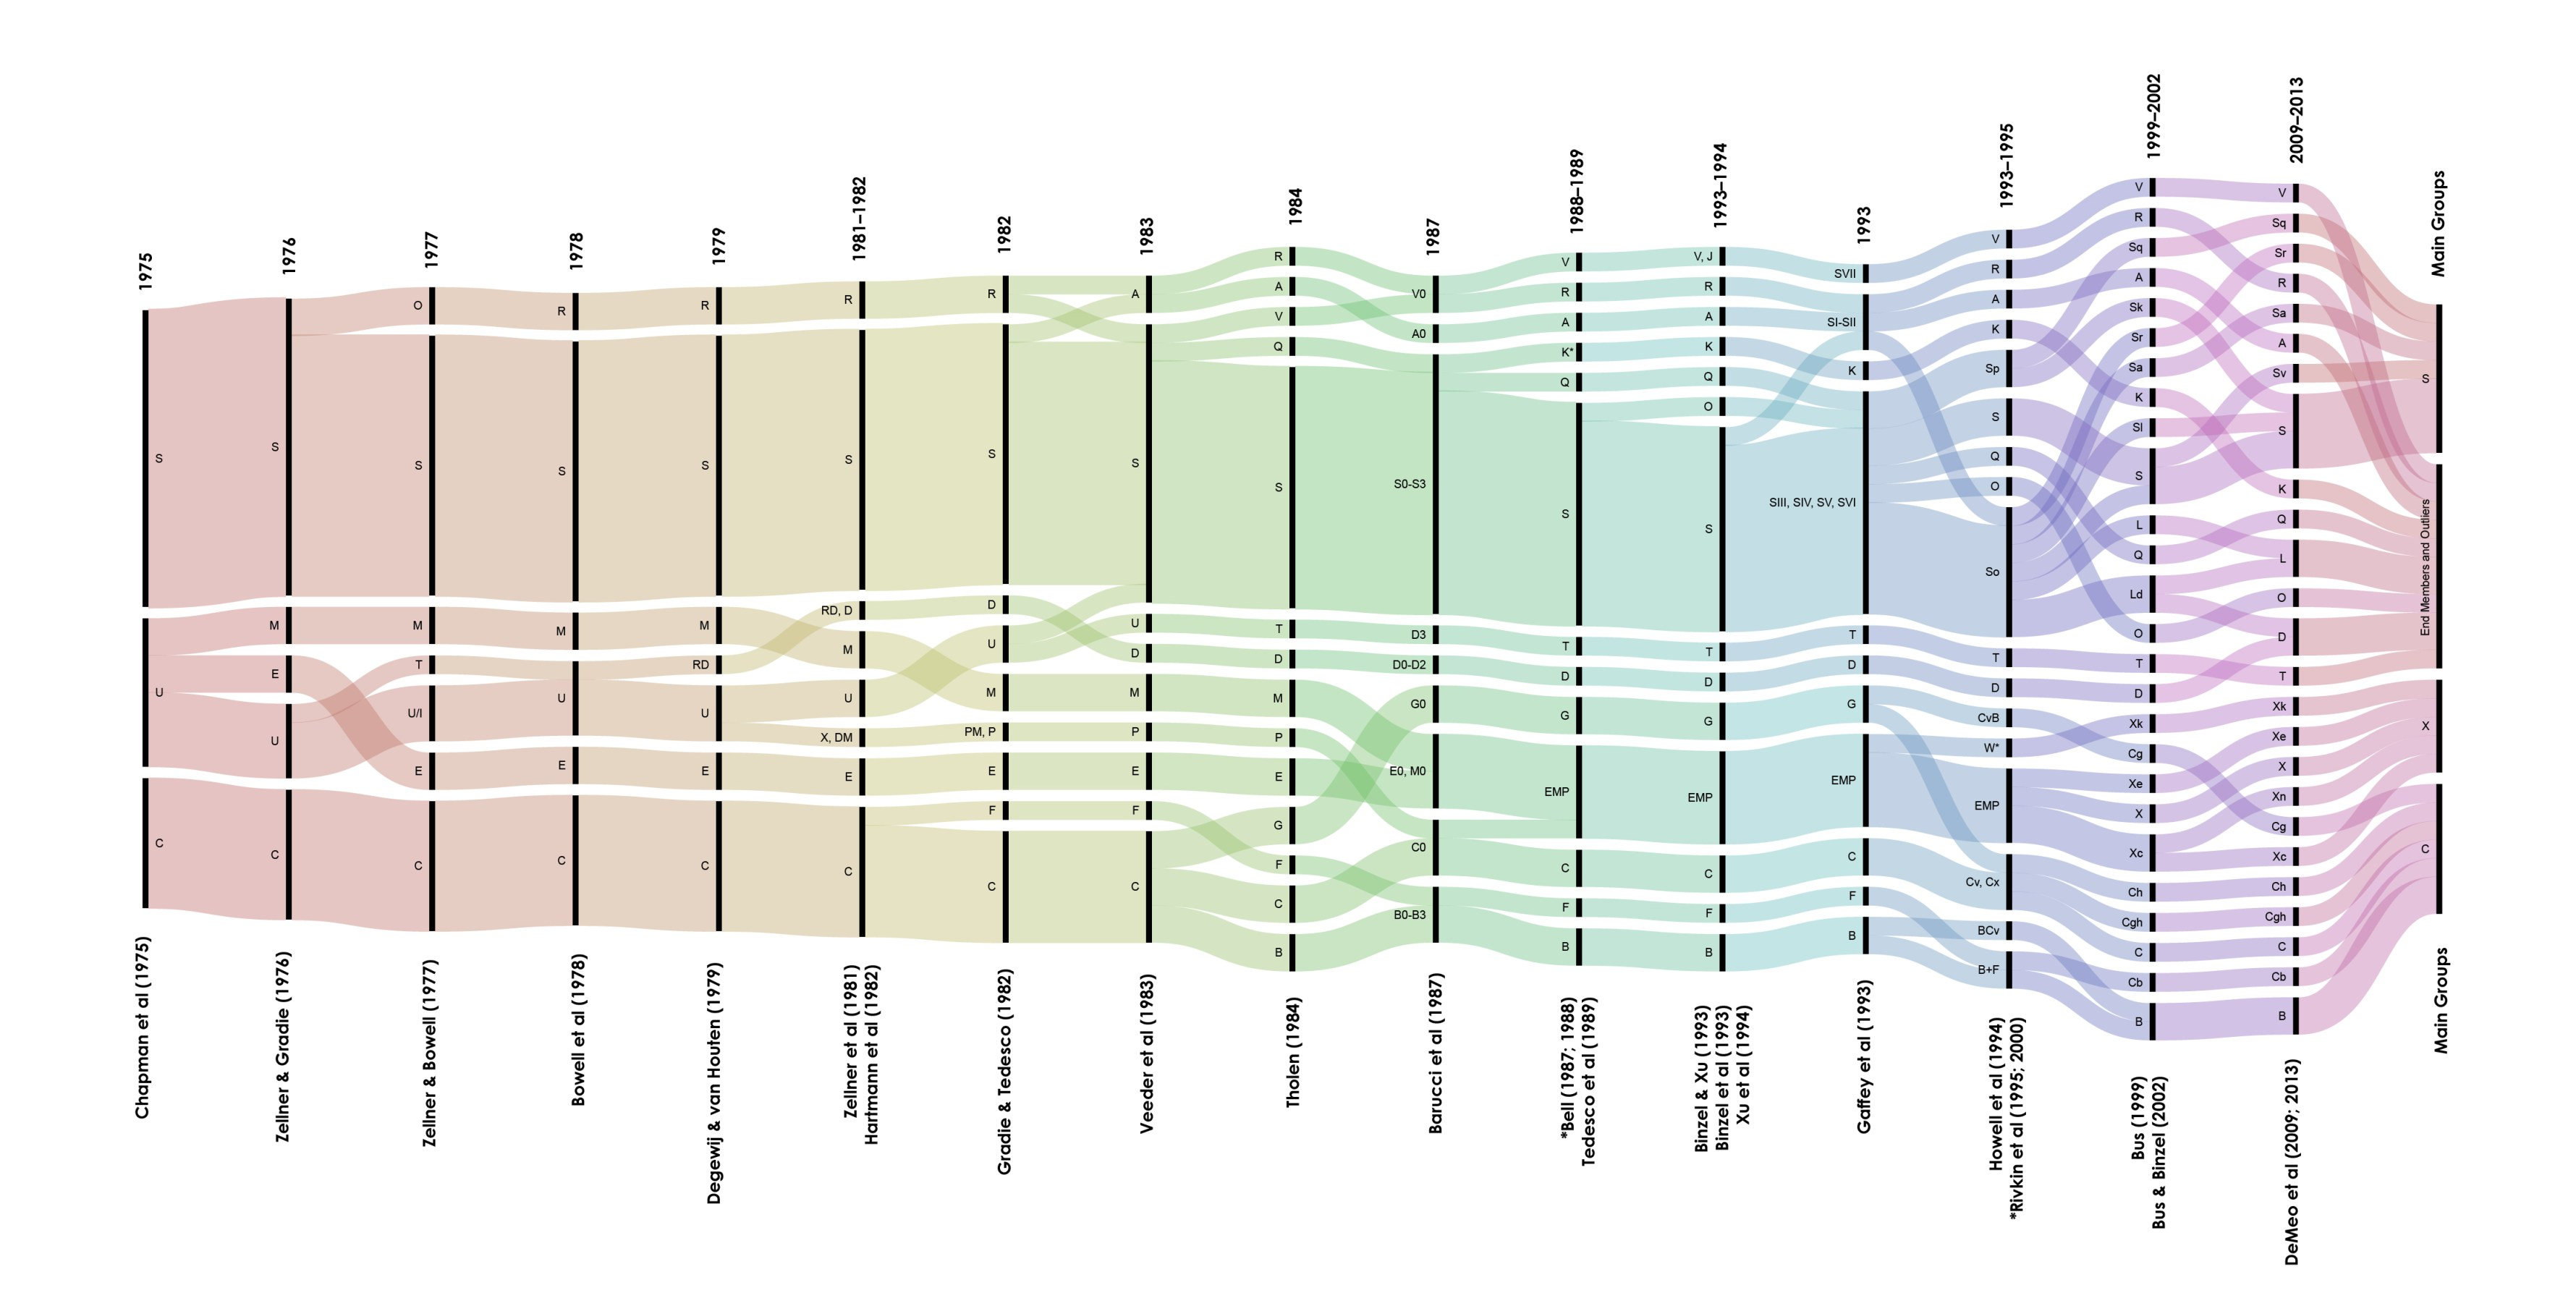

In [7]:
# Creating a dictionary that maps the Bus Classification with the main group
bus_to_main_dict = {
                    'A': 'Other',
                    'B': 'C',
                    'C': 'C',
                    'Cb': 'C',
                    'Cg': 'C',
                    'Cgh': 'C',
                    'Ch': 'C',
                    'D': 'Other',
                    'K': 'Other',
                    'L': 'Other',
                    'Ld': 'Other',
                    'O': 'Other',
                    'R': 'Other',
                    'S': 'S',
                    'Sa': 'S',
                    'Sk': 'S',
                    'Sl': 'S',
                    'Sq': 'S',
                    'Sr': 'S',
                    'T': 'Other',
                    'V': 'Other',
                    'X': 'X',
                    'Xc': 'X',
                    'Xe': 'X',
                    'Xk': 'X'
                   }

In [8]:
# Creating a "Main group class"
asteroids_df.loc[:, "Main_Group"] = asteroids_df["Bus_Class"].apply(lambda x:
                                                                    bus_to_main_dict.get(x, "None"))
# Removing the file path and Designation Number
asteroids_df.drop(columns=["DesNr", "FilePath"], inplace=True)

# Final Dataset
asteroids_df

,Name,Bus_Class,SpectrumDF,Main_Group
0,1 Ceres,C,Wavelength_in_microm Reflectance_norm550n...,C
1,2 Pallas,B,Wavelength_in_microm Reflectance_norm550n...,C
2,3 Juno,Sk,Wavelength_in_microm Reflectance_norm550n...,S
3,4 Vesta,V,Wavelength_in_microm Reflectance_norm550n...,Other
4,5 Astraea,S,Wavelength_in_microm Reflectance_norm550n...,S
...,...,...,...,...
1334,1996 UK,Sq,Wavelength_in_microm Reflectance_norm550n...,S
1335,1996 VC,S,Wavelength_in_microm Reflectance_norm550n...,S
1336,1997 CZ5,S,Wavelength_in_microm Reflectance_norm550n...,S
1337,1997 RD1,Sq,Wavelength_in_microm Reflectance_norm550n...,S


In [15]:
# Spectrum of Astraea
asteroids_df.loc[asteroids_df["Name"] == "5 Astraea"]["SpectrumDF"].iloc[0]

,Wavelength_in_microm,Reflectance_norm550nm
0,0.44,0.8395
1,0.45,0.8573
2,0.46,0.8749
3,0.47,0.8918
4,0.48,0.9073
5,0.49,0.9217
6,0.50,0.9355
7,0.51,0.9492
8,0.52,0.9630
9,0.53,0.9756


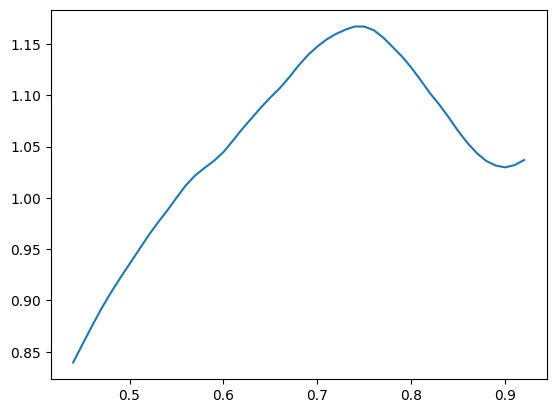

In [10]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(asteroids_df.loc[asteroids_df["Name"] == "5 Astraea"]["SpectrumDF"].iloc[0]["Wavelength_in_microm"],
         asteroids_df.loc[asteroids_df["Name"] == "5 Astraea"]["SpectrumDF"].iloc[0]["Reflectance_norm550nm"])
plt.show()

In [11]:
 # Creating a Level 2 directory and saving the dataframe
pathlib.Path(os.path.join(core_path, "data/lvl2")).mkdir(parents=True, exist_ok=True)

# Saving the dataframe as a pickle file
asteroids_df.to_pickle(os.path.join(core_path, "data/lvl2/", "asteroids.pkl"), protocol=4)